<a href="https://colab.research.google.com/github/SanjanaBoggaram/my-first-opensource-contribution/blob/main/happiestminds_supplychain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
shashwatwork_dataco_smart_supply_chain_for_big_data_analysis_path = kagglehub.dataset_download('shashwatwork/dataco-smart-supply-chain-for-big-data-analysis')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataco-smart-supply-chain-for-big-data-analysis/tokenized_access_logs.csv
/kaggle/input/dataco-smart-supply-chain-for-big-data-analysis/DataCoSupplyChainDataset.csv
/kaggle/input/dataco-smart-supply-chain-for-big-data-analysis/DescriptionDataCoSupplyChain.csv


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Downloading the dataset into dataframe and very basic EDA

In [ ]:
df = pd.read_csv("/kaggle/input/dataco-smart-supply-chain-for-big-data-analysis/DataCoSupplyChainDataset.csv" , encoding='ISO-8859-1')

In [ ]:
df.head(8)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class
5,TRANSFER,6,4,18.580000,294.980011,Shipping canceled,0,73,Sporting Goods,Tonawanda,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/19/2018 11:03,Standard Class
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 10:42,First Class
7,TRANSFER,2,1,68.430000,285.140015,Late delivery,1,73,Sporting Goods,Miami,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 10:21,First Class


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

Here I see Product Decription has 0 non-null and Order Zipcode has only 24840 non null.

## Handling missing data

In [ ]:
column_nan_count = df.isnull().sum()
print("NaN count per column:")
print(column_nan_count)

NaN count per column:
Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market            

I'll drop the columns Product description and Order Zipcode

In [ ]:
df.drop('Product Description', axis=1, inplace=True)
df.drop('Order Zipcode', axis=1, inplace=True)

 to try to understand where Customer is from and where they are ordering to

In [ ]:
print(df[['Customer Id','Customer Fname','Market' ,'Customer Segment','Customer Country','Customer State', 'Customer City','Order Country','Order State','Order City','Order Region','Department Name','order date (DateOrders)','shipping date (DateOrders)']]. head(10))

   Customer Id Customer Fname        Market Customer Segment Customer Country  \
0        20755          Cally  Pacific Asia         Consumer      Puerto Rico   
1        19492          Irene  Pacific Asia         Consumer      Puerto Rico   
2        19491        Gillian  Pacific Asia         Consumer          EE. UU.   
3        19490           Tana  Pacific Asia      Home Office          EE. UU.   
4        19489           Orli  Pacific Asia        Corporate      Puerto Rico   
5        19488       Kimberly  Pacific Asia         Consumer          EE. UU.   
6        19487      Constance  Pacific Asia      Home Office      Puerto Rico   
7        19486          Erica  Pacific Asia        Corporate          EE. UU.   
8        19485        Nichole  Pacific Asia        Corporate      Puerto Rico   
9        19484          Oprah  Pacific Asia        Corporate          EE. UU.   

  Customer State Customer City Order Country      Order State  Order City  \
0             PR        Caguas 

What im seeing here is that the Customer is based of USA, but the Order is to other parts of the world.
Customer Segment:'Consumer' 'Home Office' 'Corporate'

So what I understand is Customer is like the Middleman, whos supplying to the their clients in other countries.

I initially thought Customer Fnames might be businesses names or so, but looks like thats not the case

The 'Market' column looks like a generalization of the 'Order Country'

In [ ]:
print(df[['Customer Email','Customer Password']].head(10))

  Customer Email Customer Password
0      XXXXXXXXX         XXXXXXXXX
1      XXXXXXXXX         XXXXXXXXX
2      XXXXXXXXX         XXXXXXXXX
3      XXXXXXXXX         XXXXXXXXX
4      XXXXXXXXX         XXXXXXXXX
5      XXXXXXXXX         XXXXXXXXX
6      XXXXXXXXX         XXXXXXXXX
7      XXXXXXXXX         XXXXXXXXX
8      XXXXXXXXX         XXXXXXXXX
9      XXXXXXXXX         XXXXXXXXX


Ill drop customer emails and passwords as they are masked and add no importance to us

In [ ]:
df.drop(['Customer Email','Customer Password'], axis=1, inplace=True)

In [ ]:
df = df.drop(columns=['Customer Fname','Customer Lname','Customer Street'])

In [ ]:
print(df[['Product Image']].head(10))

                                  Product Image
0  http://images.acmesports.sports/Smart+watch 
1  http://images.acmesports.sports/Smart+watch 
2  http://images.acmesports.sports/Smart+watch 
3  http://images.acmesports.sports/Smart+watch 
4  http://images.acmesports.sports/Smart+watch 
5  http://images.acmesports.sports/Smart+watch 
6  http://images.acmesports.sports/Smart+watch 
7  http://images.acmesports.sports/Smart+watch 
8  http://images.acmesports.sports/Smart+watch 
9  http://images.acmesports.sports/Smart+watch 


In [ ]:
df.drop('Product Image', axis=1, inplace=True)

# EDA

In [ ]:
df['Sales_log'] = np.log1p(df['Sales'])  # Log transform

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


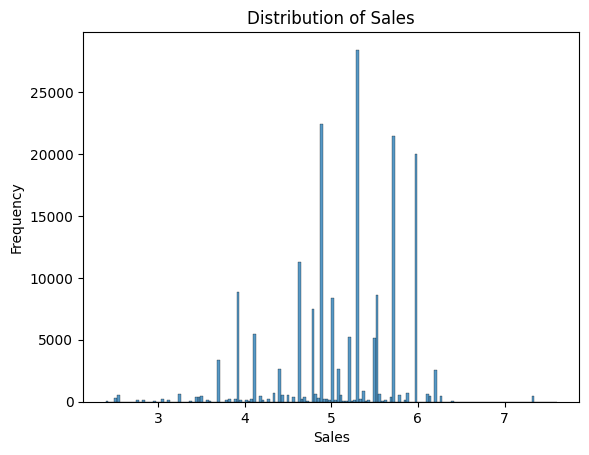

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='Sales_log', kde=False)  # kde=True if you want a density curve
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


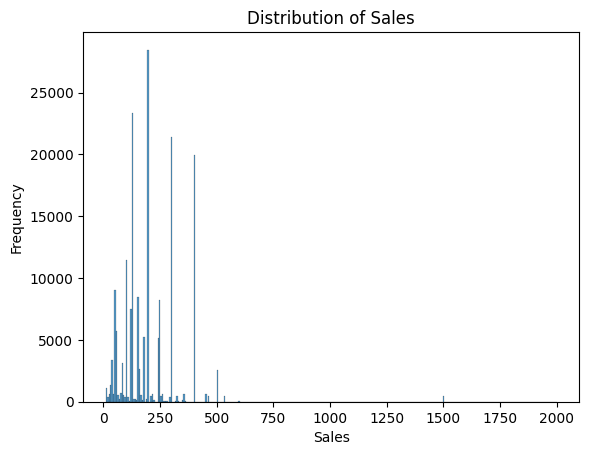

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='Sales', kde=False)  # kde=True if you want a density curve
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [ ]:
corr1 = df['Sales'].corr(df['Shipment_Delay'], method='pearson')
print(corr1)
corr2 = df['Sales_log'].corr(df['Shipment_Delay'], method='pearson')
print(corr2)

-0.0036954616892054047
-0.0027254076511874013


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

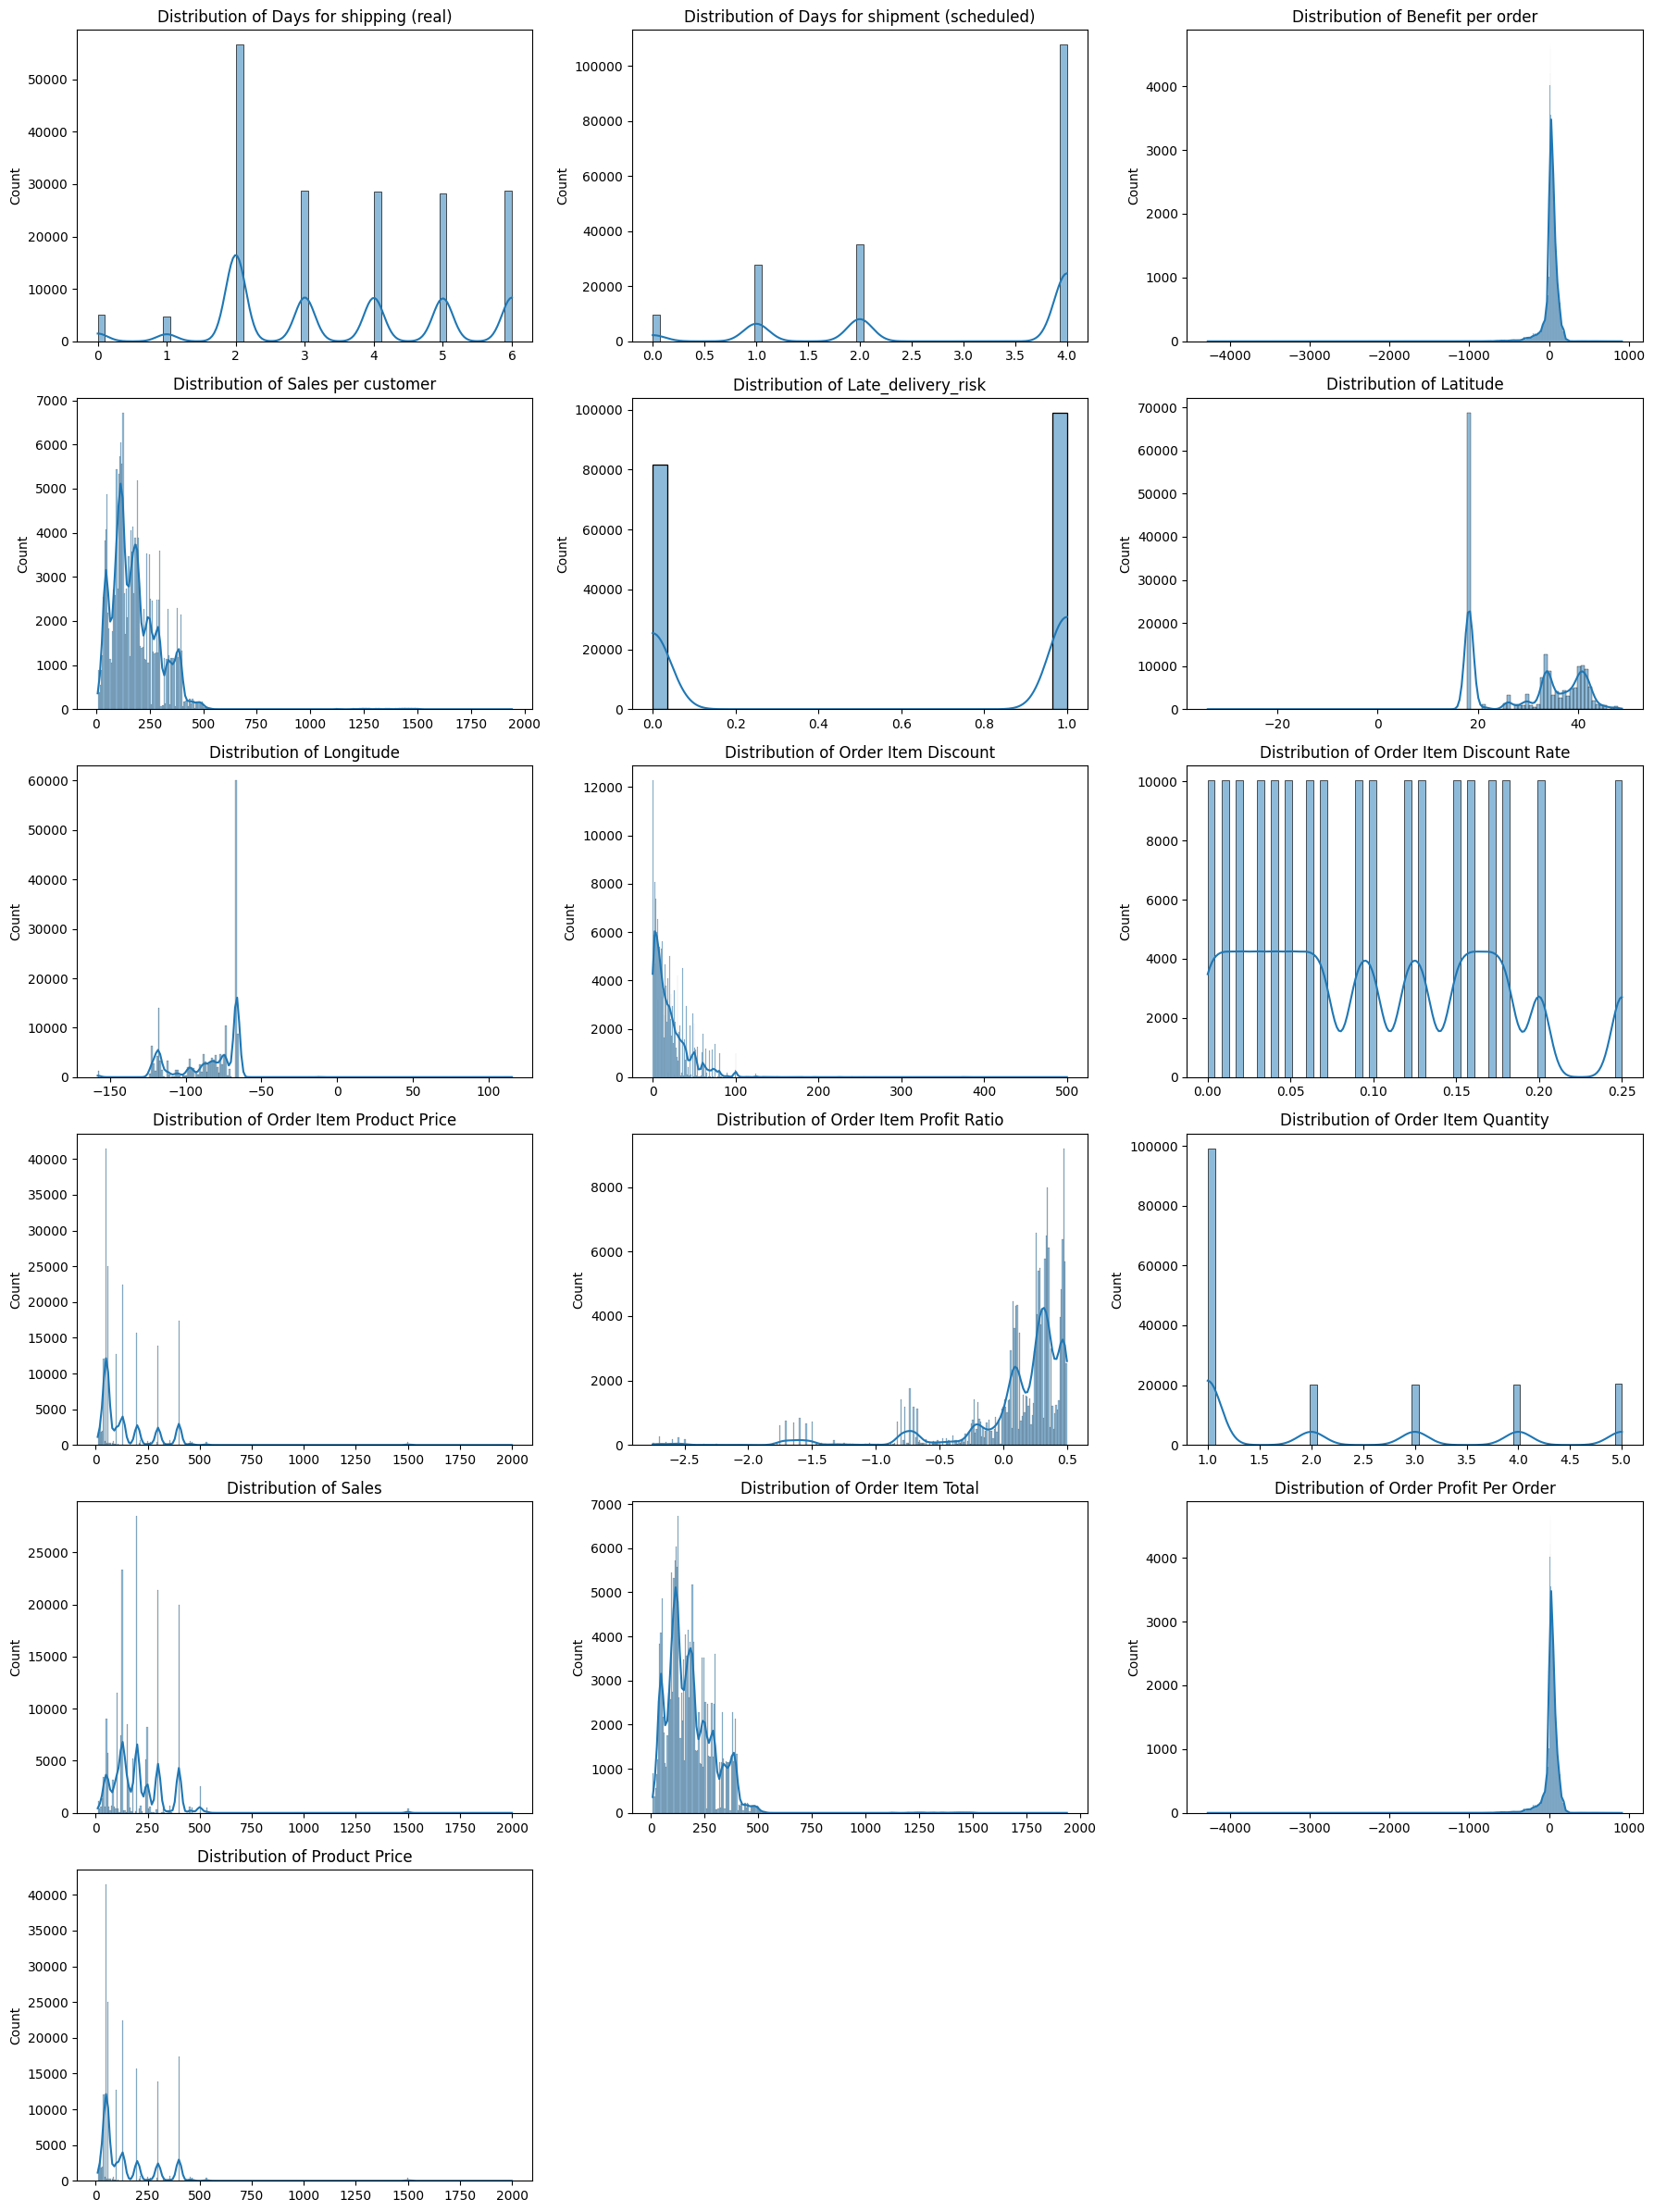

/tmp/ipykernel_35/1839754167.py:52: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_35/1839754167.py:52: UserWarning: Glyph 138 (\x8a) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_35/1839754167.py:52: UserWarning: Glyph 142 (\x8e) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 138 (\x8a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


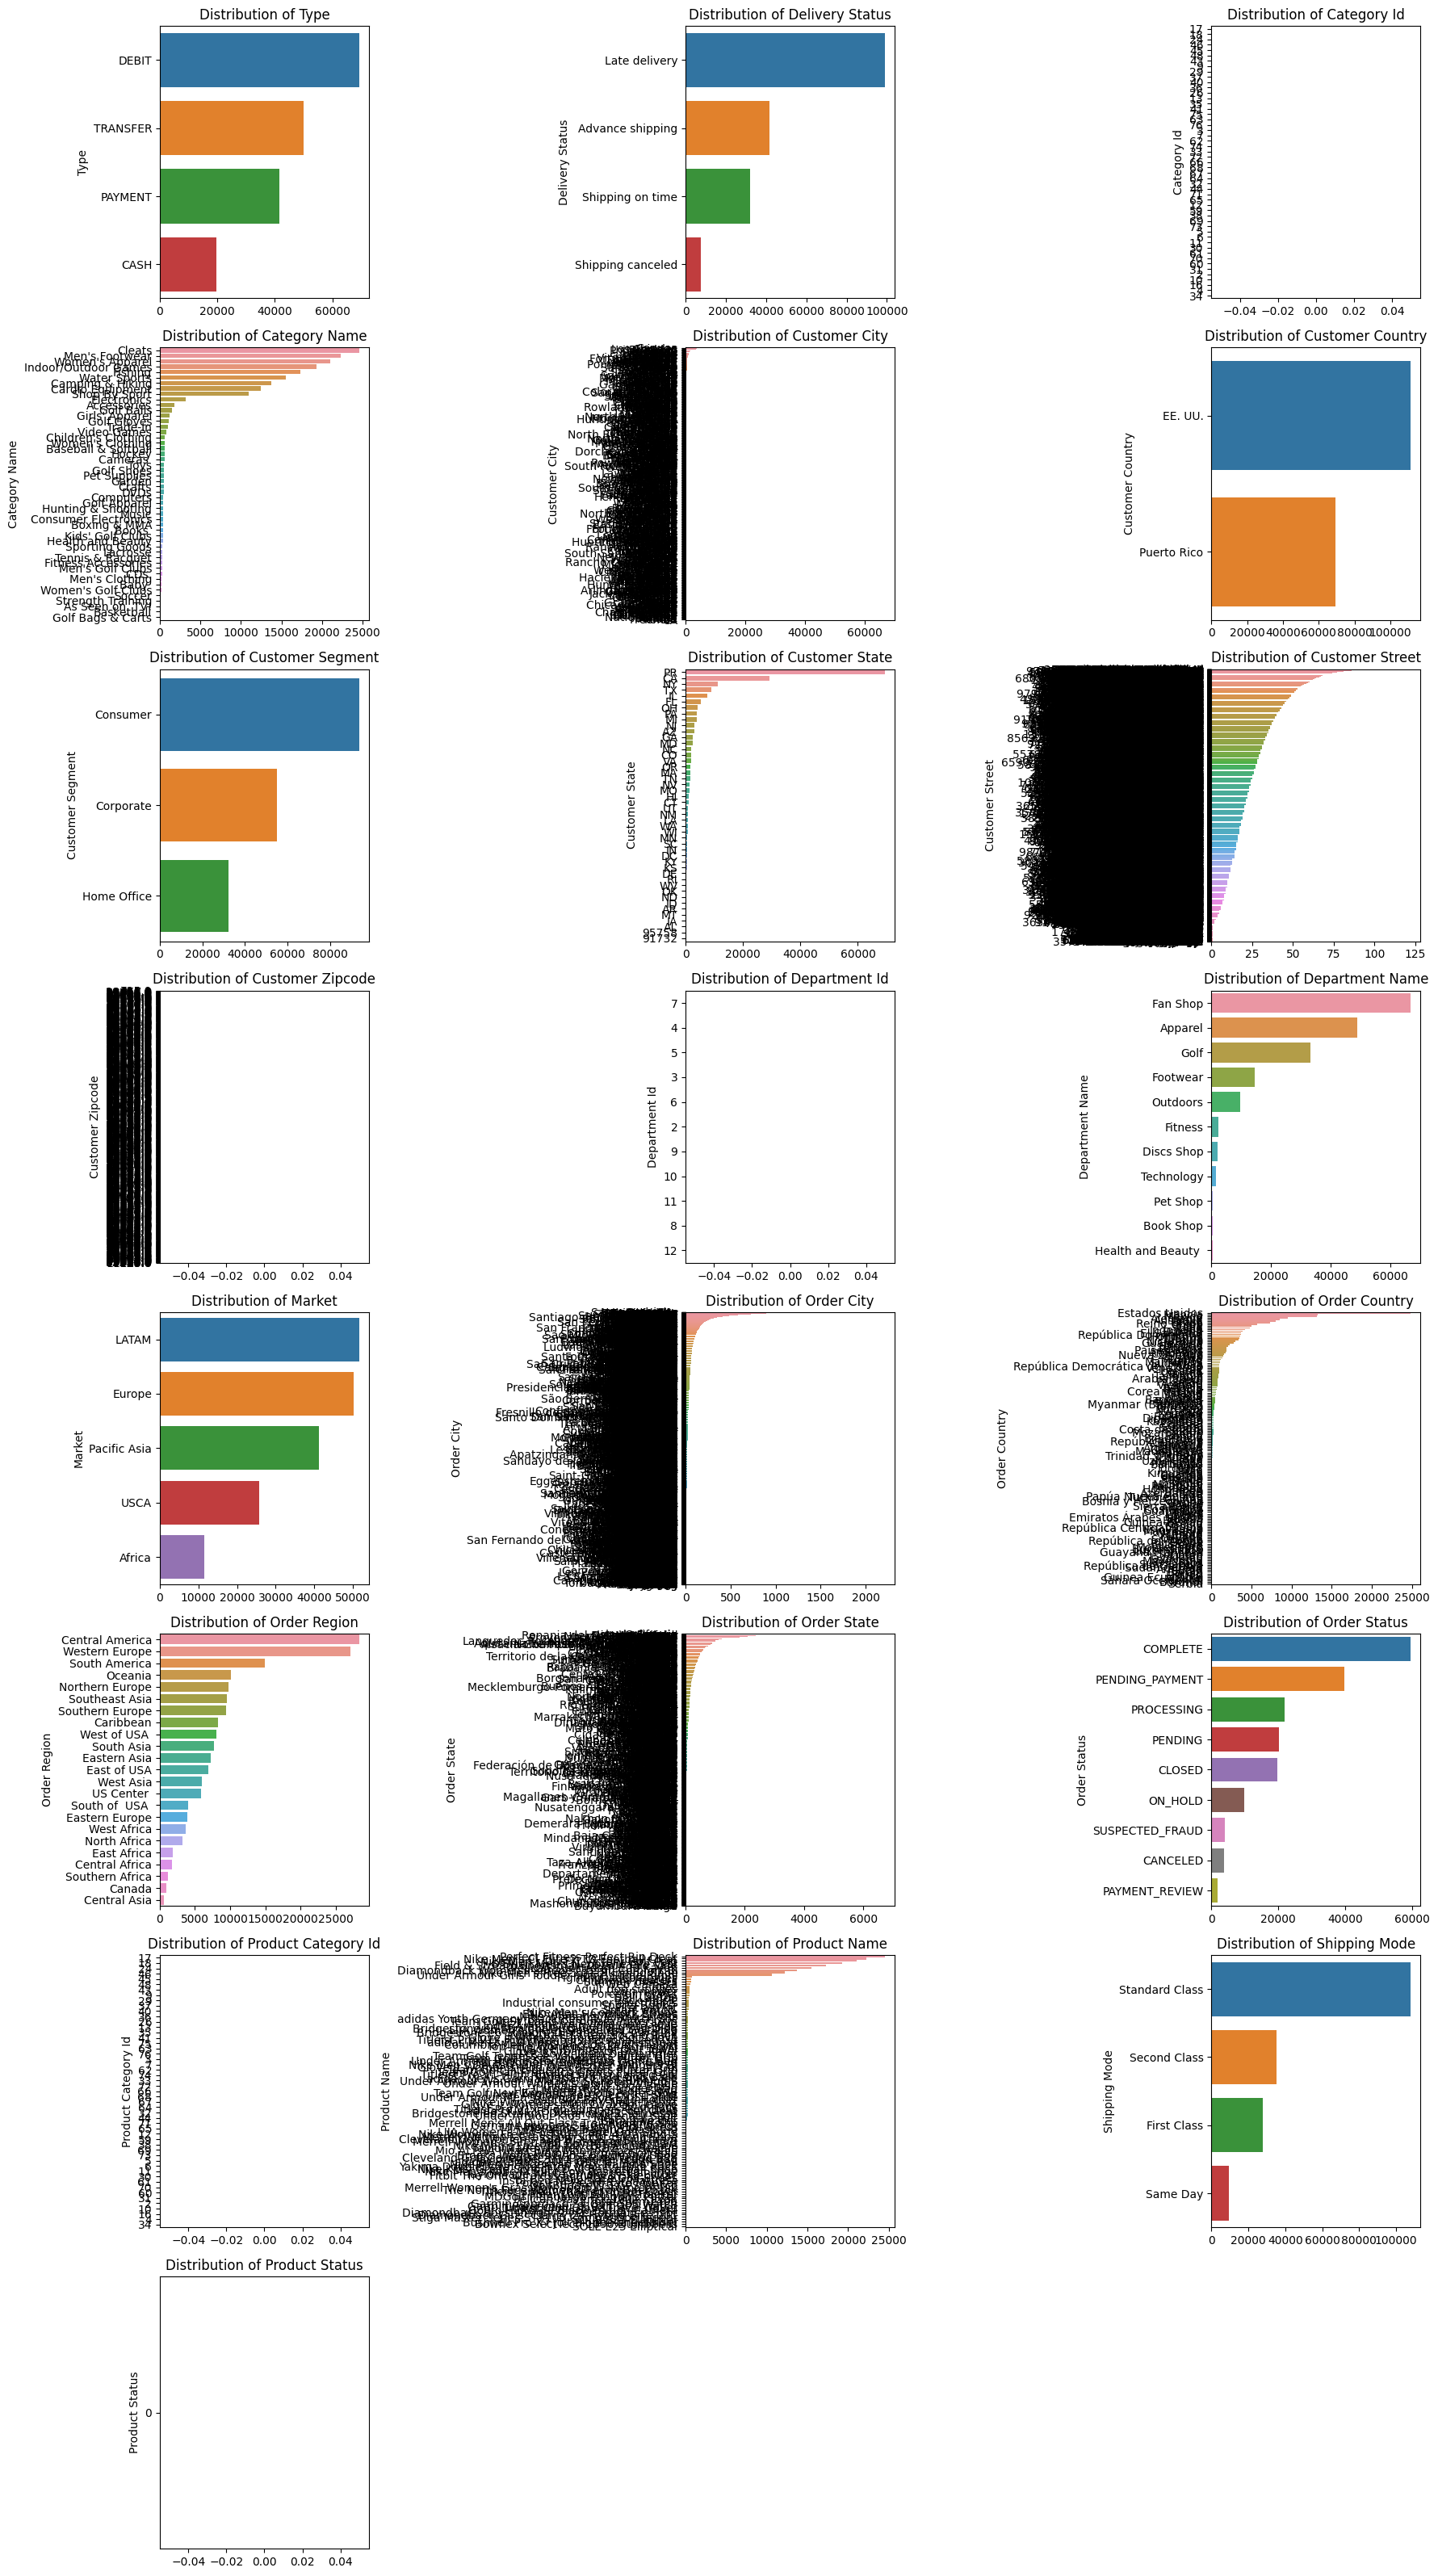

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your existing column lists
numerical_cols = [
    "Days for shipping (real)", "Days for shipment (scheduled)", "Benefit per order", "Sales per customer",
    "Late_delivery_risk", "Latitude", "Longitude", "Order Item Discount", "Order Item Discount Rate",
    "Order Item Product Price", "Order Item Profit Ratio", "Order Item Quantity", "Sales",
    "Order Item Total", "Order Profit Per Order", "Product Price"
]

categorical_cols = [
    "Type", "Delivery Status", "Category Id", "Category Name", "Customer City", "Customer Country",
    "Customer Segment", "Customer State", "Customer Street", "Customer Zipcode", "Department Id",
    "Department Name", "Market", "Order City", "Order Country", "Order Region", "Order State",
    "Order Status", "Product Category Id", "Product Name", "Shipping Mode", "Product Status"
]

# Plotting numerical distributions
n_num = len(numerical_cols)
rows_num = (n_num // 3) + (n_num % 3 > 0)
fig, axes = plt.subplots(rows_num, 3, figsize=(18, rows_num * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')

# Turn off unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Plotting categorical distributions
n_cat = len(categorical_cols)
rows_cat = (n_cat // 3) + (n_cat % 3 > 0)
fig, axes = plt.subplots(rows_cat, 3, figsize=(18, rows_cat * 4))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(y=df[col].astype(str), order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')

# Turn off unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Plotting bar grapghs to compare frequencies of real and scheduled days for shipping

In [ ]:
dataset[float_cols] = (dataset[float_cols] - dataset[float_cols].min()) / (dataset[float_cols].max() - dataset[float_cols].min())
dataset.head(10)

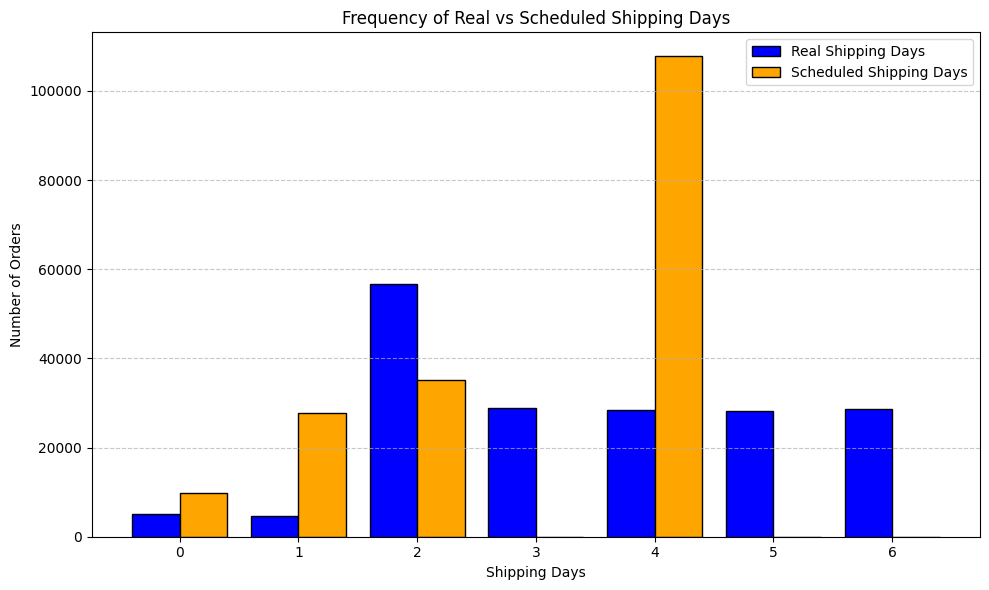

In [ ]:
# Count frequency of each integer shipping day
real_counts = df['Days for shipping (real)'].value_counts().sort_index()
scheduled_counts = df['Days for shipment (scheduled)'].value_counts().sort_index()

# Make sure both indexes cover the same full range
all_days = sorted(set(real_counts.index).union(set(scheduled_counts.index)))

real_counts = real_counts.reindex(all_days, fill_value=0)
scheduled_counts = scheduled_counts.reindex(all_days, fill_value=0)

# Bar width and positions for side-by-side bars
bar_width = 0.4
x = np.arange(len(all_days))

plt.figure(figsize=(10,6))
plt.bar(x - bar_width/2, real_counts, width=bar_width, label='Real Shipping Days', color='blue', edgecolor='black')
plt.bar(x + bar_width/2, scheduled_counts, width=bar_width, label='Scheduled Shipping Days', color='orange', edgecolor='black')

plt.xticks(x, all_days)
plt.xlabel('Shipping Days')
plt.ylabel('Number of Orders')
plt.title('Frequency of Real vs Scheduled Shipping Days')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


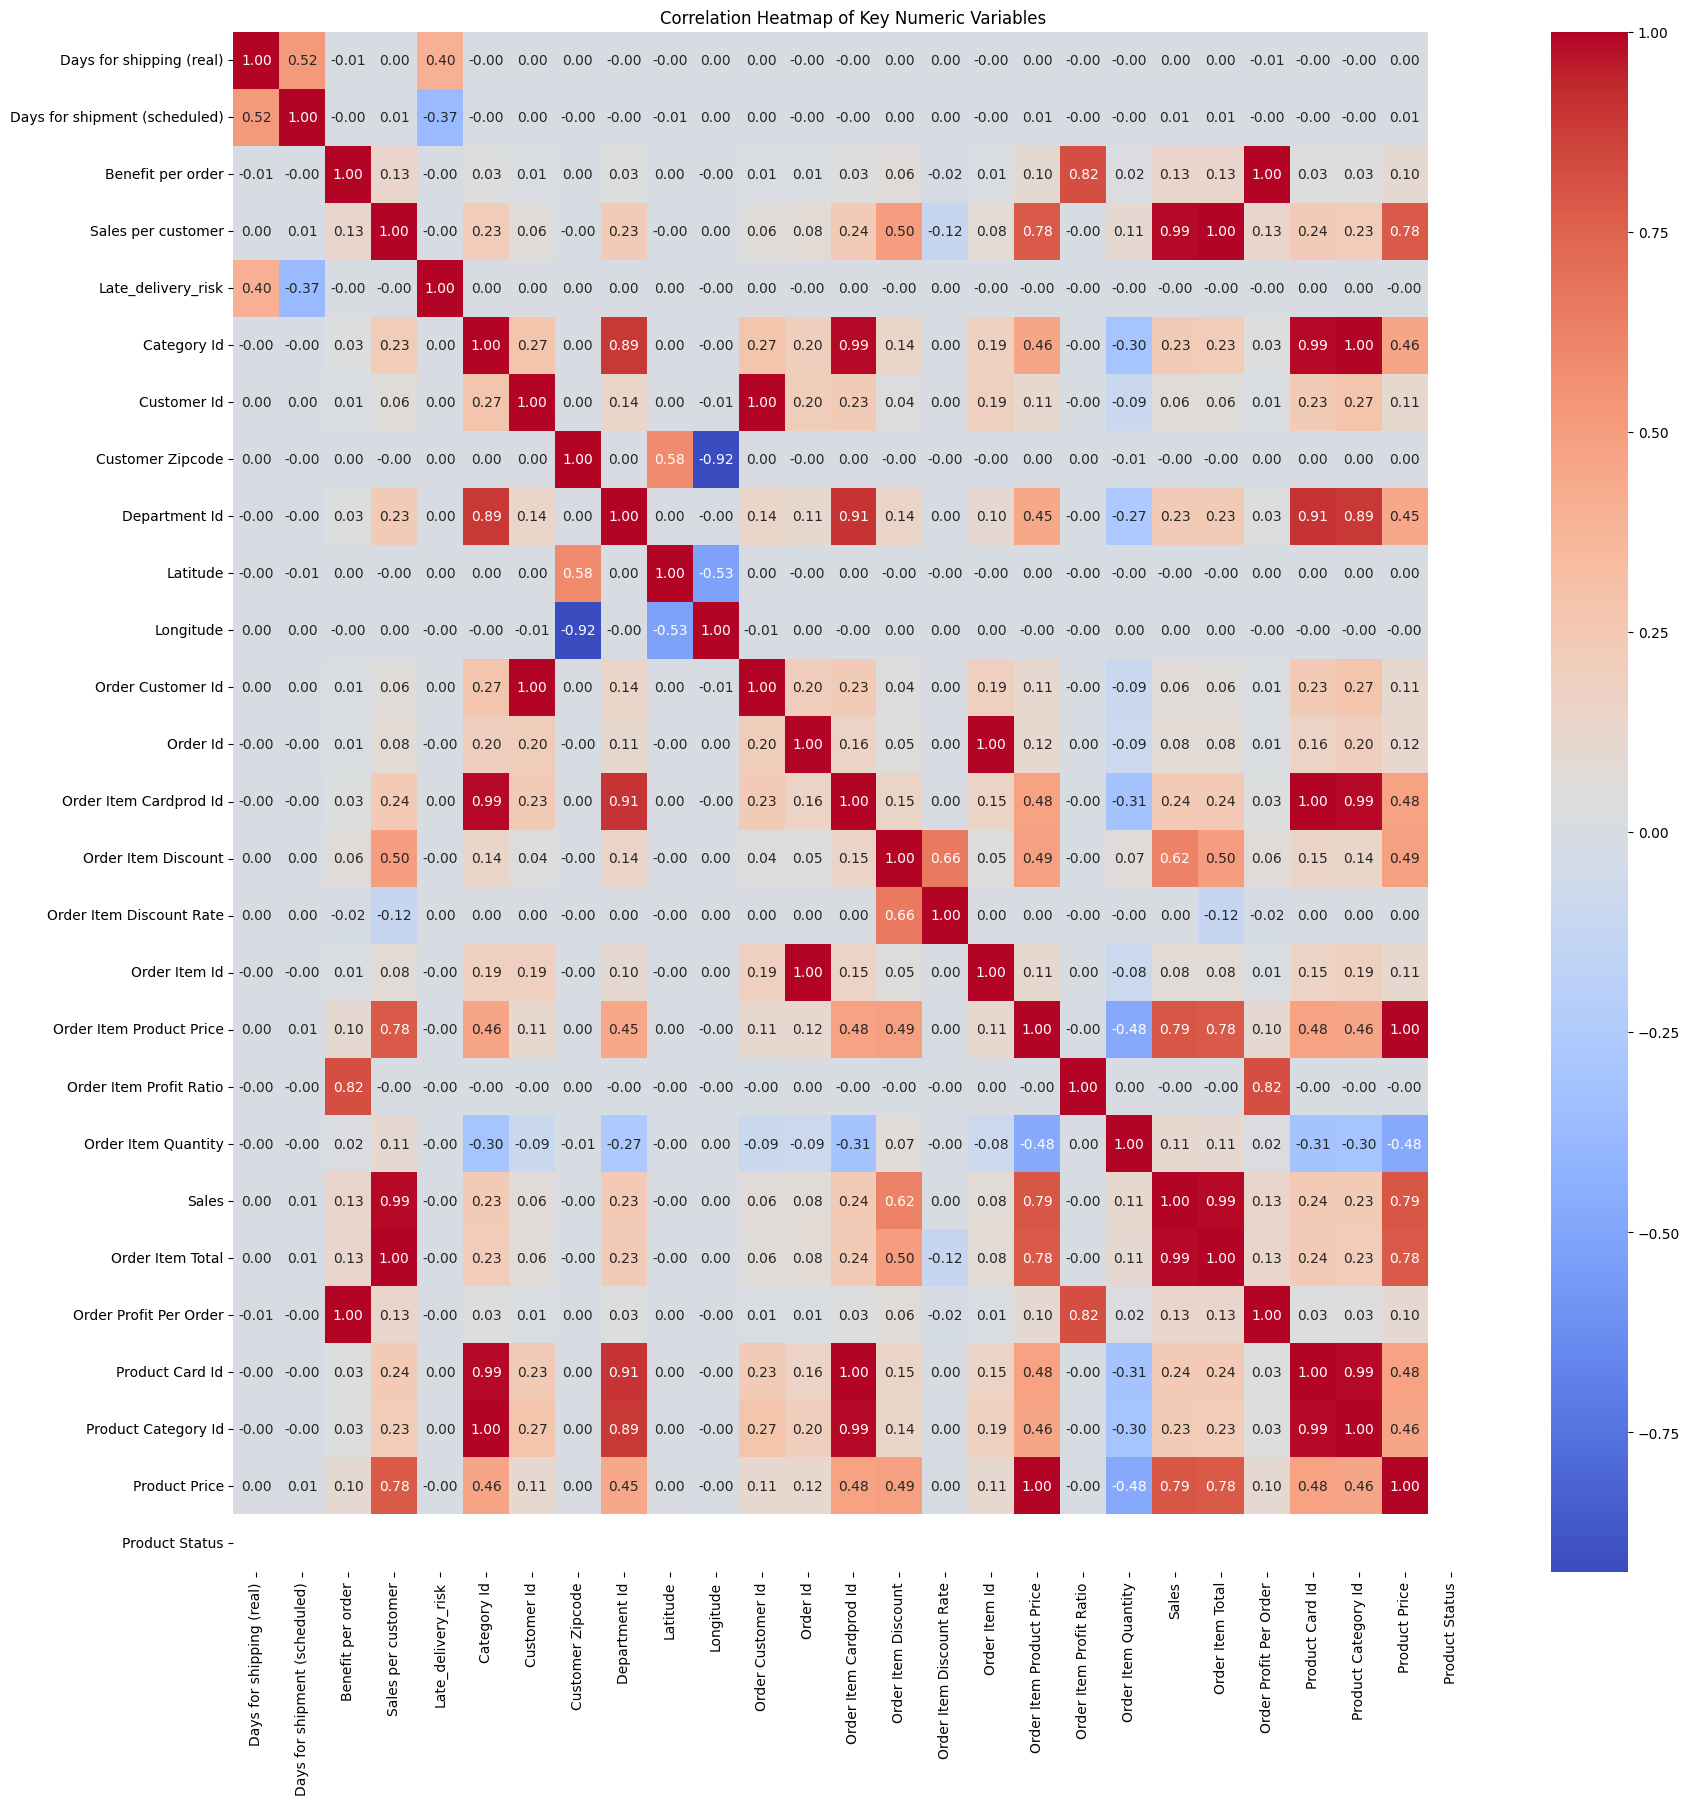

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 20))
sns.heatmap(df[numeric_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Key Numeric Variables')
plt.show()

* Product Price and Order Item Product Price
* 'Product Card Id', 'Order Item Cardprod Id',Product Category Id and Category Id
* Sales, Sales per customer, Order Item Total
* Order Profit Per Order and Benefit per order
* Order Id and Order item Id
* Customer Id and Order Customer Id

Insights from Heatmap:
1. Columns that are similar with same values but with different metadata (duplicate columns)

[Benefit per order], Order Profit per order
[Sales per customer], Sales, Order Item Total
[Category ID], Product Category ID, Order Customer ID, Order Item Category ID, Product card ID,
[Order Item Product Price],Product Price
2. Unwanted features(null or less correlated values)

Product Description
Product Status

In [ ]:
df = df.drop(columns=['Product Category Id','Sales'])


In [ ]:
df = df.drop(columns=['Order Profit Per Order','Order Item Id','Order Customer Id','Sales per customer','Order Item Product Price','Order Item Cardprod Id'])

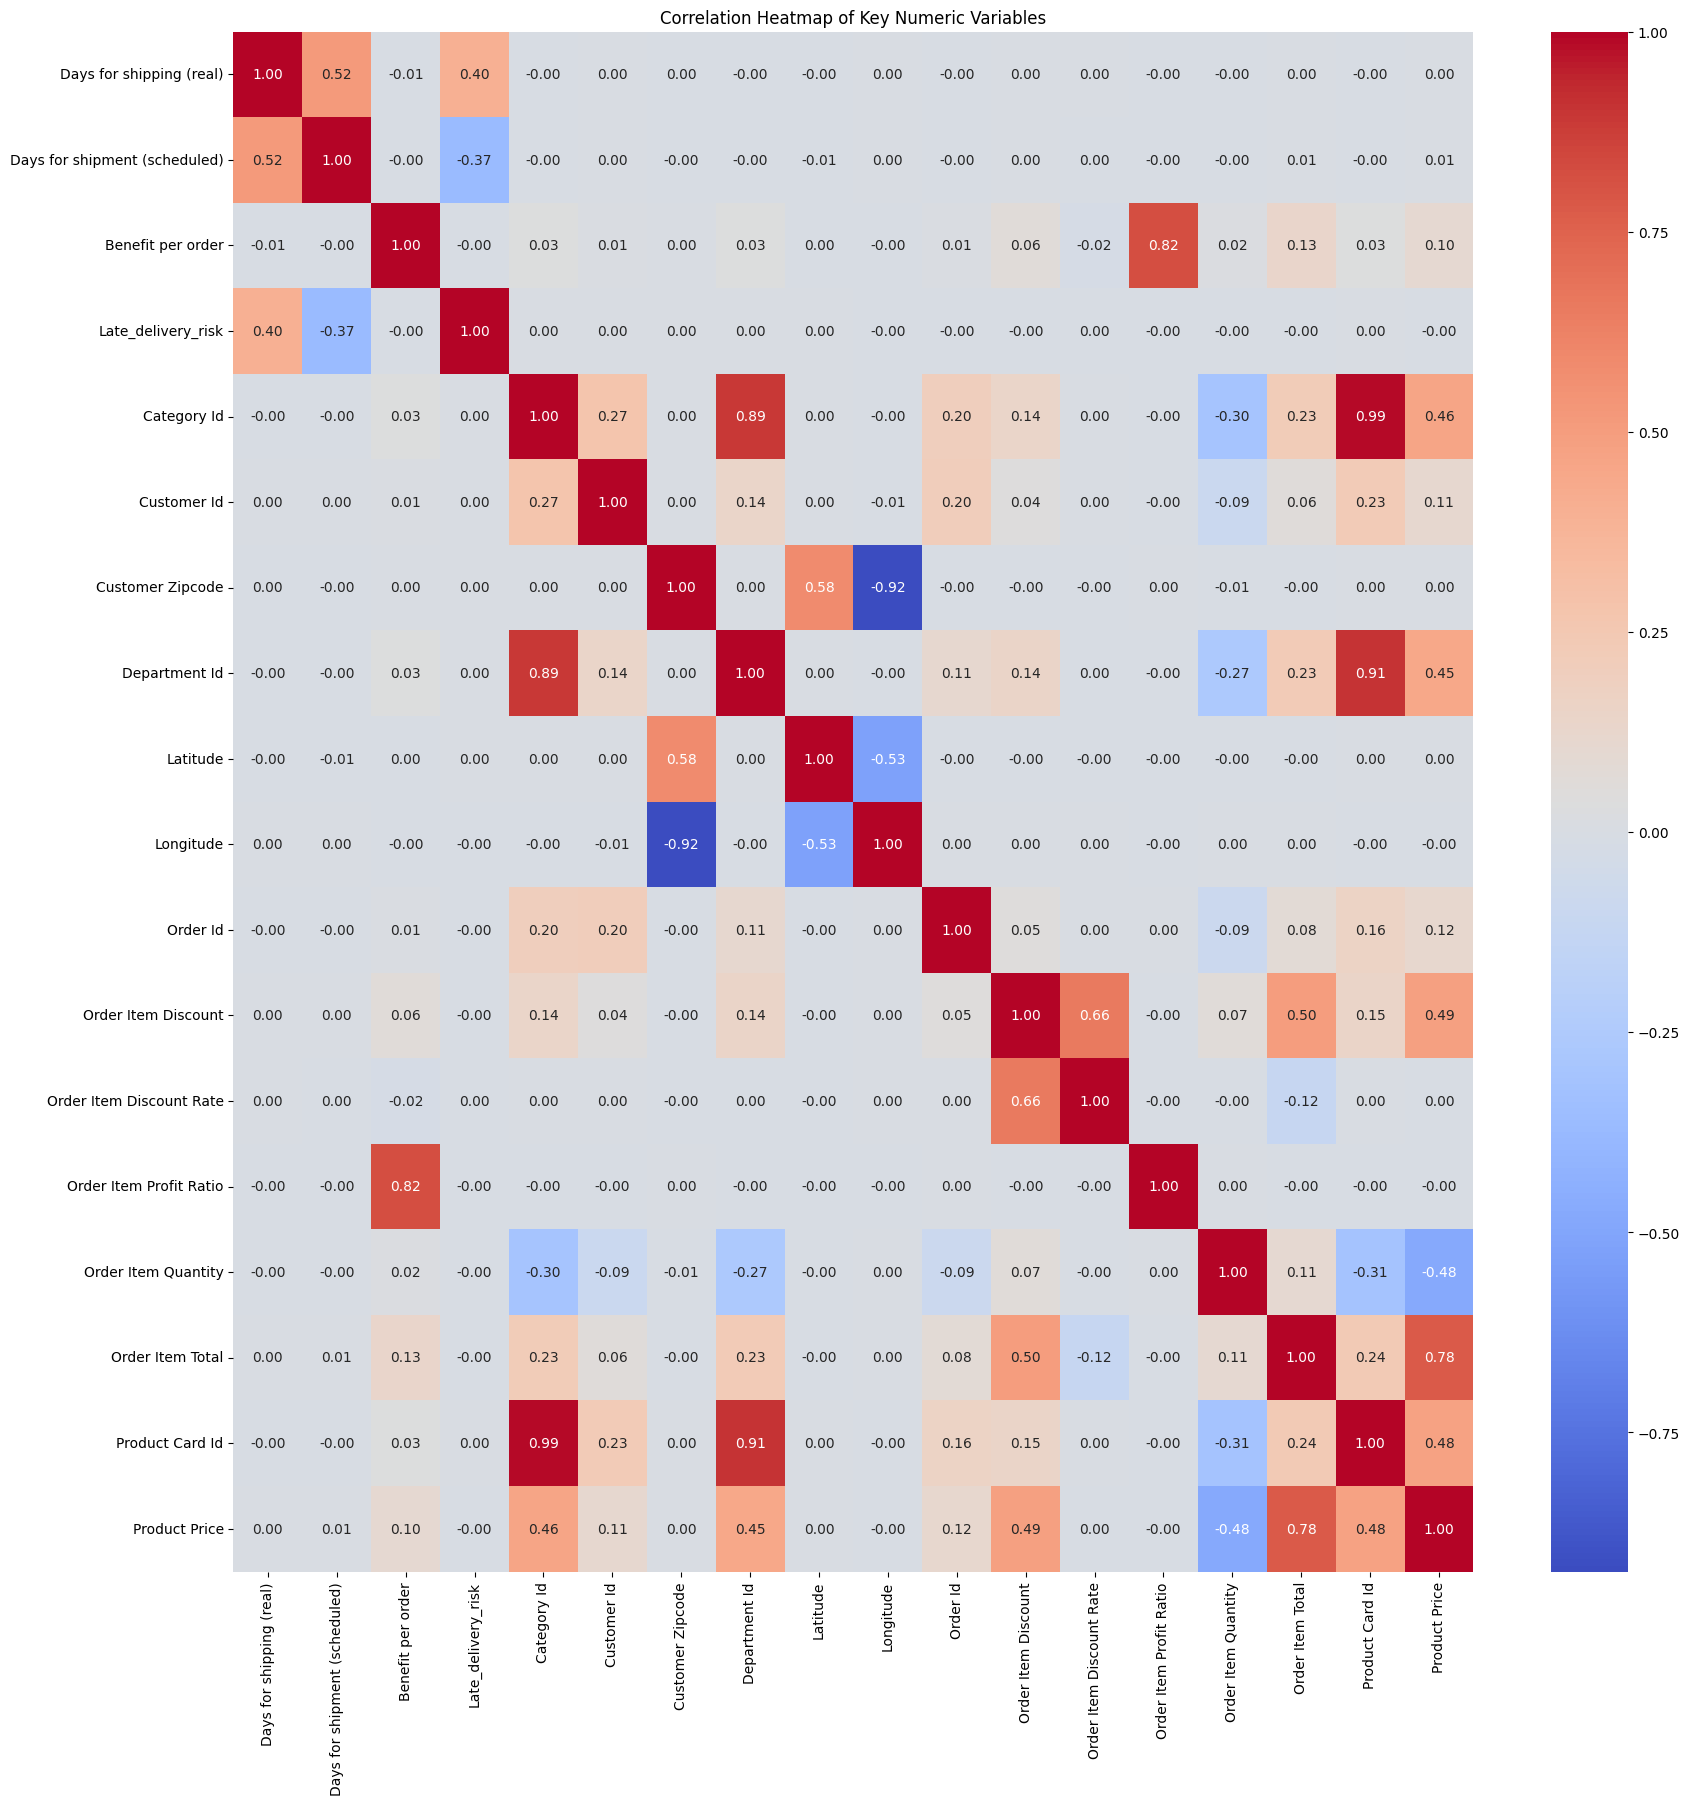

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 20))
sns.heatmap(df[numeric_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Key Numeric Variables')
plt.show()

In [ ]:
num_columns = df.shape[1]
print(f"Number of columns: {num_columns}")


Number of columns: 38


In [ ]:
print(df['Category Name'].unique())

['Sporting Goods' 'Cleats' 'Shop By Sport' "Women's Apparel" 'Electronics'
 'Boxing & MMA' 'Cardio Equipment' 'Trade-In' "Kids' Golf Clubs"
 'Hunting & Shooting' 'Baseball & Softball' "Men's Footwear"
 'Camping & Hiking' 'Consumer Electronics' 'Cameras ' 'Computers'
 'Basketball' 'Soccer' "Girls' Apparel" 'Accessories' "Women's Clothing"
 'Crafts' "Men's Clothing" 'Tennis & Racquet' 'Fitness Accessories'
 'As Seen on  TV!' 'Golf Balls' 'Strength Training' "Children's Clothing"
 'Lacrosse' 'Baby ' 'Fishing' 'Books ' 'DVDs' 'CDs ' 'Garden' 'Hockey'
 'Pet Supplies' 'Health and Beauty' 'Music' 'Video Games' 'Golf Gloves'
 'Golf Bags & Carts' 'Golf Shoes' 'Golf Apparel' "Women's Golf Clubs"
 "Men's Golf Clubs" 'Toys' 'Water Sports' 'Indoor/Outdoor Games']


In [ ]:
print(df['Department Name'].unique())

['Fitness' 'Apparel' 'Golf' 'Footwear' 'Outdoors' 'Fan Shop' 'Technology'
 'Book Shop' 'Discs Shop' 'Pet Shop' 'Health and Beauty ']


In [ ]:
print(df[['Department Name', 'Category Name']])


       Department Name   Category Name
0              Fitness  Sporting Goods
1              Fitness  Sporting Goods
2              Fitness  Sporting Goods
3              Fitness  Sporting Goods
4              Fitness  Sporting Goods
...                ...             ...
180514        Fan Shop         Fishing
180515        Fan Shop         Fishing
180516        Fan Shop         Fishing
180517        Fan Shop         Fishing
180518        Fan Shop         Fishing

[180519 rows x 2 columns]


In [ ]:
filtered_tech = df[df['Department Name'] == 'Technology']
print(filtered_tech[['Department Name', 'Category Name']])


       Department Name         Category Name
145         Technology  Consumer Electronics
146         Technology              Cameras 
147         Technology  Consumer Electronics
148         Technology              Cameras 
149         Technology  Consumer Electronics
...                ...                   ...
179068      Technology  Consumer Electronics
179069      Technology  Consumer Electronics
179070      Technology              Cameras 
179206      Technology  Consumer Electronics
179217      Technology              Cameras 

[1465 rows x 2 columns]


So under each Department there are multiple Categories

In [ ]:
print(df['Customer Country'].unique())

['Puerto Rico' 'EE. UU.']


In the coorelation map i see that Order Item Cardprod Id and Product Card Id has 1.00 correalation, so i want to just check out a few examples to see if they are the same.

In [ ]:
# Finding Order Ids that have multiple items
multi_item_orders = df['Order Id'].value_counts()
multi_item_orders = multi_item_orders[multi_item_orders > 4].index

filtered_df = df[df['Order Id'].isin(multi_item_orders)]
print(filtered_df[['Order Id', 'Product Card Id']])


        Order Id  Product Card Id
49         45461              627
50         31115              502
52         47752              502
68         17162              365
71         64813              627
...          ...              ...
180507     26059             1004
180511     26051             1004
180513     26047             1004
180515     26037             1004
180516     26024             1004

[56765 rows x 2 columns]


In [ ]:
print(df[df['Order Id'] == 45461][['Order Id', 'Product Card Id','shipping date (DateOrders)','Category Name']])


        Order Id  Product Card Id shipping date (DateOrders)  \
49         45461              627           10/27/2016 14:39   
515        45461              502           10/27/2016 14:39   
112661     45461             1014           10/27/2016 14:39   
179242     45461              403           10/27/2016 14:39   
179305     45461              191           10/27/2016 14:39   

               Category Name  
49             Shop By Sport  
515          Women's Apparel  
112661  Indoor/Outdoor Games  
179242        Men's Footwear  
179305      Cardio Equipment  


In [ ]:
print(df[df['Order Id'] == 31115][['Order Id', 'Product Card Id']])


        Order Id  Product Card Id
50         31115              502
1304       31115              191
130993     31115             1014
179245     31115              627
179247     31115              957


Both the columns are the same, so can drop one of them

Days for shippment real and scheduled, corellation coeff is only 0.52, the prediction is not that good and it can be improved by our analysis

In [ ]:
print(df['Product Status'].value_counts())


Product Status
0    180519
Name: count, dtype: int64


All of the values are 0 so lets drop the column

In [ ]:
df = df.drop(columns=['Product Status'])


## Checking if shippment delay and state have any relation

Checking relations between Order Country, State, city
Customer Country state city etc

In [ ]:
df['Order Country'].unique()


array(['Indonesia', 'India', 'Australia', 'China', 'Japón',
       'Corea del Sur', 'Singapur', 'Turquía', 'Mongolia',
       'Estados Unidos', 'Nigeria', 'República Democrática del Congo',
       'Senegal', 'Marruecos', 'Alemania', 'Francia', 'Países Bajos',
       'Reino Unido', 'Guatemala', 'El Salvador', 'Panamá',
       'República Dominicana', 'Venezuela', 'Colombia', 'Honduras',
       'Brasil', 'México', 'Uruguay', 'Argentina', 'Cuba', 'Perú',
       'Nicaragua', 'Ecuador', 'Angola', 'Sudán', 'Somalia',
       'Costa de Marfil', 'Egipto', 'Italia', 'España', 'Suecia',
       'Austria', 'Canada', 'Madagascar', 'Argelia', 'Liberia', 'Zambia',
       'Níger', 'SudAfrica', 'Mozambique', 'Tanzania', 'Ruanda', 'Israel',
       'Nueva Zelanda', 'Bangladés', 'Tailandia', 'Irak', 'Arabia Saudí',
       'Filipinas', 'Kazajistán', 'Irán', 'Myanmar (Birmania)',
       'Uzbekistán', 'Benín', 'Camerún', 'Kenia', 'Togo', 'Ucrania',
       'Polonia', 'Portugal', 'Rumania', 'Trinidad y Tobago',


In [ ]:
df['Order State'].unique()


array(['Java Occidental', 'Rajastán', 'Queensland', ...,
       'Bistrita-Nasaud', 'Tottori', 'Khorezm'], dtype=object)

In [ ]:
# Unique countries and their count
unique_countries = df['Order Country'].unique()
print("Unique Order Countries:")
print(unique_countries)
print(f"Total number of countries: {len(unique_countries)}\n")

# Unique states and their count
unique_states = df['Order State'].unique()
print("Unique Order States:")
print(unique_states)
print(f"Total number of states: {len(unique_states)}")


Unique Order Countries:
['Indonesia' 'India' 'Australia' 'China' 'Japón' 'Corea del Sur'
 'Singapur' 'Turquía' 'Mongolia' 'Estados Unidos' 'Nigeria'
 'República Democrática del Congo' 'Senegal' 'Marruecos' 'Alemania'
 'Francia' 'Países Bajos' 'Reino Unido' 'Guatemala' 'El Salvador' 'Panamá'
 'República Dominicana' 'Venezuela' 'Colombia' 'Honduras' 'Brasil'
 'México' 'Uruguay' 'Argentina' 'Cuba' 'Perú' 'Nicaragua' 'Ecuador'
 'Angola' 'Sudán' 'Somalia' 'Costa de Marfil' 'Egipto' 'Italia' 'España'
 'Suecia' 'Austria' 'Canada' 'Madagascar' 'Argelia' 'Liberia' 'Zambia'
 'Níger' 'SudAfrica' 'Mozambique' 'Tanzania' 'Ruanda' 'Israel'
 'Nueva Zelanda' 'Bangladés' 'Tailandia' 'Irak' 'Arabia Saudí' 'Filipinas'
 'Kazajistán' 'Irán' 'Myanmar (Birmania)' 'Uzbekistán' 'Benín' 'Camerún'
 'Kenia' 'Togo' 'Ucrania' 'Polonia' 'Portugal' 'Rumania'
 'Trinidad y Tobago' 'Afganistán' 'Pakistán' 'Vietnam' 'Malasia'
 'Finlandia' 'Rusia' 'Irlanda' 'Noruega' 'Eslovaquia' 'Bélgica' 'Bolivia'
 'Chile' 'Jamaica' 'Ye

In [ ]:
df['Shipment_Delay'] = df['Days for shipping (real)'] - df['Days for shipment (scheduled)']


/tmp/ipykernel_357/3811182288.py:9: UserWarning: Glyph 138 (\x8a) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_357/3811182288.py:9: UserWarning: Glyph 142 (\x8e) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 138 (\x8a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


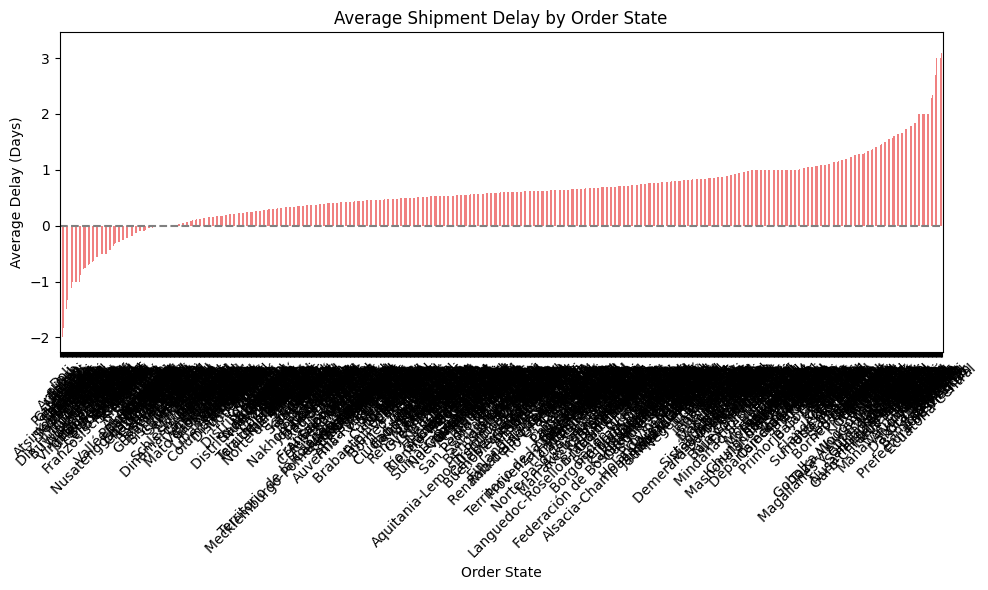

In [ ]:
delay_by_state = df.groupby('Order State')['Shipment_Delay'].mean().sort_values()

plt.figure(figsize=(10, 6))
delay_by_state.plot(kind='bar', color='lightcoral')
plt.title('Average Shipment Delay by Order State')
plt.ylabel('Average Delay (Days)')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


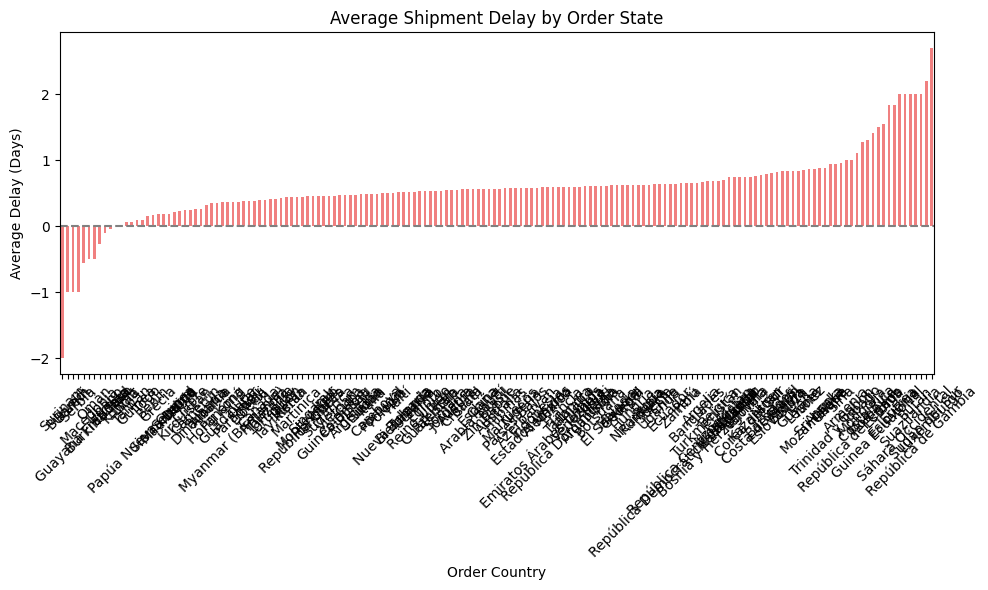

In [ ]:
delay_by_state = df.groupby('Order Country')['Shipment_Delay'].mean().sort_values()

plt.figure(figsize=(10, 6))
delay_by_state.plot(kind='bar', color='lightcoral')
plt.title('Average Shipment Delay by Order State')
plt.ylabel('Average Delay (Days)')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import f_oneway

# Create a list of delays per state
groups = [group['Shipment_Delay'].values for name, group in df.groupby('Order State')]
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat}, p-value: {p_val}")


ANOVA F-statistic: 3.8818008937415183, p-value: 0.0


In [ ]:
from scipy.stats import f_oneway

# Create a list of delays per state
groups = [group['Shipment_Delay'].values for name, group in df.groupby('Order Country')]
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat}, p-value: {p_val}")


ANOVA F-statistic: 3.8537055516684893, p-value: 1.149204664690925e-55


Too many States so lets drop it and keep Country

In [ ]:
df.drop(columns=['Order State'], inplace=True)


In [ ]:
df.info()

In [ ]:
df['Order Region'].unique()


array(['Southeast Asia', 'South Asia', 'Oceania', 'Eastern Asia',
       'West Asia', 'West of USA ', 'US Center ', 'West Africa',
       'Central Africa', 'North Africa', 'Western Europe',
       'Northern Europe', 'Central America', 'Caribbean', 'South America',
       'East Africa', 'Southern Europe', 'East of USA', 'Canada',
       'Southern Africa', 'Central Asia', 'Eastern Europe',
       'South of  USA '], dtype=object)

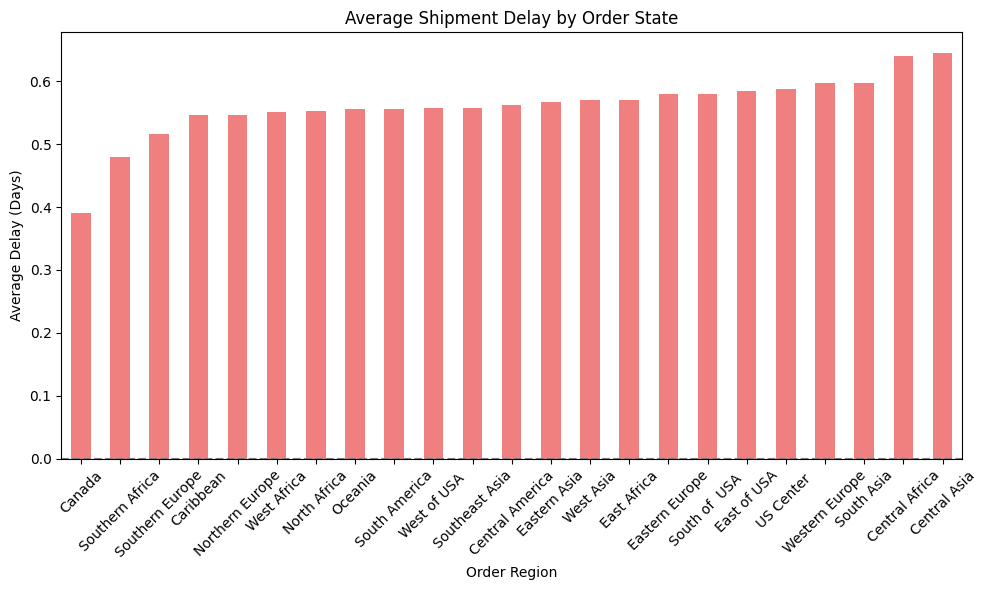

In [ ]:
delay_by_state = df.groupby('Order Region')['Shipment_Delay'].mean().sort_values()

plt.figure(figsize=(10, 6))
delay_by_state.plot(kind='bar', color='lightcoral')
plt.title('Average Shipment Delay by Order State')
plt.ylabel('Average Delay (Days)')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import f_oneway

# Create a list of delays per state
groups = [group['Shipment_Delay'].values for name, group in df.groupby('Order Region')]
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat}, p-value: {p_val}")


ANOVA F-statistic: 2.6194763678794266, p-value: 4.9872996711779306e-05


In [ ]:
# Basic stats
min_delay = df['Shipment_Delay'].min()
max_delay = df['Shipment_Delay'].max()

print(f"Shipment Delay ranges from {min_delay:.2f} to {max_delay:.2f} days")


Shipment Delay ranges from -2.00 to 4.00 days


In [ ]:
# Step 1: Compute average shipment delay per country
country_avg_delay = df.groupby('Order Country')['Shipment_Delay'].mean()

# Step 2: Define custom bin edges and labels
bins = [-2, -1, 0, 1, 2, 4]
labels = ['-2 to -1', '-1 to 0', '0 to 1', '1 to 2', '2 to 4']

# Step 3: Bin countries by their average delay
country_grouped = pd.cut(country_avg_delay, bins=bins, labels=labels, include_lowest=True)

# Step 4: Map the result back to the main dataframe
df['Order Country Grouped'] = df['Order Country'].map(country_grouped)


In [ ]:
print(df['Order Country Grouped'].unique())

['0 to 1', '1 to 2', '-1 to 0', '-2 to -1', '2 to 4']
Categories (5, object): ['-2 to -1' < '-1 to 0' < '0 to 1' < '1 to 2' < '2 to 4']


In [ ]:
from scipy.stats import f_oneway

# Create a list of delays per state
groups = [group['Shipment_Delay'].values for name, group in df.groupby('Order Country Grouped')]
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat}, p-value: {p_val}")


ANOVA F-statistic: 42.263174189981925, p-value: 1.7360012454755698e-35


/tmp/ipykernel_357/3710782989.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['Shipment_Delay'].values for name, group in df.groupby('Order Country Grouped')]


So lets drop Order Region, Order State, Order City, Order Street,Order Country

In [ ]:
df = df.drop(columns=['Order Region','Order City','Order Country','Order State'])

In [ ]:
from scipy.stats import f_oneway

# Create a list of delays per state
groups = [group['Shipment_Delay'].values for name, group in df.groupby('Customer Country')]
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat}, p-value: {p_val}")


ANOVA F-statistic: 0.4202694865770968, p-value: 0.5168034309110261


In [ ]:
from scipy.stats import f_oneway

# Create a list of delays per state
groups = [group['Shipment_Delay'].values for name, group in df.groupby('Customer City')]
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat}, p-value: {p_val}")


ANOVA F-statistic: 3.51824928030306, p-value: 2.3756784032874155e-155


In [ ]:
from scipy.stats import f_oneway

# Create a list of delays per state
groups = [group['Shipment_Delay'].values for name, group in df.groupby('Customer State')]
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat}, p-value: {p_val}")


ANOVA F-statistic: 3.989663149613366, p-value: 5.7240661025387835e-18


In [ ]:
# Unique countries and their count
unique_countries = df['Customer Country'].unique()

print(f"Total number of countries: {len(unique_countries)}\n")

# Unique states and their count
unique_states = df['Customer State'].unique()

print(f"Total number of states: {len(unique_states)}")

# Unique states and their count
unique_states = df['Customer City'].unique()

print(f"Total number of states: {len(unique_states)}")

Unique Order Countries:
['Puerto Rico' 'EE. UU.']
Total number of countries: 2

Unique Order States:
['PR' 'CA' 'NY' 'FL' 'MA' 'IL' 'MT' 'PA' 'MI' 'TX' 'DE' 'GA' 'MD' 'OH'
 'HI' 'NJ' 'WI' 'AZ' 'CO' 'MN' 'NC' 'NM' 'OR' 'SC' 'VA' 'UT' 'WA' 'KY'
 'WV' 'RI' 'CT' 'LA' 'TN' 'DC' 'ND' 'MO' 'IN' 'ID' 'NV' 'KS' 'AR' 'OK'
 'AL' 'IA' '95758' '91732']
Total number of states: 46
Unique Order States:
['Caguas' 'San Jose' 'Los Angeles' 'Tonawanda' 'Miami' 'San Ramon'
 'Freeport' 'Salinas' 'Peabody' 'Canovanas' 'Paramount' 'Mount Prospect'
 'Long Beach' 'Rancho Cordova' 'Billings' 'Wilkes Barre' 'Roseville'
 'Bellflower' 'Wheaton' 'Detroit' 'Dallas' 'Carlisle' 'Newark'
 'Panorama City' 'Atlanta' 'Fremont' 'Rochester' 'Bayamon' 'Guayama'
 'Juana Diaz' 'Fort Washington' 'Bakersfield' 'Corona' 'Cincinnati'
 'Germantown' 'Carrollton' 'Houston' 'Ewa Beach' 'Lakewood' 'Rome' 'Vista'
 'Fort Worth' 'Fond Du Lac' 'Philadelphia' 'Ontario' 'Oviedo' 'Buffalo'
 'Honolulu' 'Oceanside' 'North Tonawanda' 'Clovis' 'Ja

In [ ]:
# Step 1: Calculate average delay per customer state
state_avg_delay = df.groupby('Customer State')['Shipment_Delay'].mean()

# Step 2: Create quantile bins on the average delay Series
state_groups = pd.qcut(state_avg_delay, q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Step 3: Map the quantile groups back to each row in the main dataframe
df['Customer_State_Grouped'] = df['Customer State'].map(state_groups)

# Step 4: Check counts per group
print(df['Customer_State_Grouped'].value_counts())

Customer_State_Grouped
Q3    131432
Q2     28196
Q4     11415
Q1      9476
Name: count, dtype: int64


In [ ]:
from scipy.stats import f_oneway

# Create a list of delays per state
groups = [group['Shipment_Delay'].values for name, group in df.groupby('Customer_State_Grouped')]
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat}, p-value: {p_val}")


ANOVA F-statistic: 45.163132484153216, p-value: 3.637384110008845e-29


/tmp/ipykernel_357/3587167174.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['Shipment_Delay'].values for name, group in df.groupby('Customer_State_Grouped')]


In [ ]:
group_sizes = df.groupby('Customer State Grouped').size()
print(group_sizes)


Customer State Grouped
-2 to -1         0
-1 to 0          1
0 to 1      180518
1 to 2           0
2 to 4           0
dtype: int64


/tmp/ipykernel_357/1873192140.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_sizes = df.groupby('Customer State Grouped').size()


Lets drop 'Customer State','Customer City','Customer Street'


In [ ]:
df = df.drop(columns=['Customer State','Customer City','Customer Street'])

Checking if Zipcode is an important feature

In [ ]:
from scipy.stats import f_oneway

# Create a list of delays per state
groups = [group['Shipment_Delay'].values for name, group in df.groupby('Customer Zipcode')]
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat}, p-value: {p_val}")


ANOVA F-statistic: 3.3693316601669205, p-value: 9.42004563415755e-249


In [ ]:
# Unique countries and their count
unique_countries = df['Customer Zipcode'].unique()
print("Unique Customer zipcodes:")
print(unique_countries)
print(f"Total number of zipcodes: {len(unique_countries)}\n")

Unique Customer zipcodes:
[  725. 95125. 90027. 14150. 33162. 94583. 11520. 93905.  1960.   729.
 90723. 60056. 90813. 95670. 59102. 18702. 48066. 90706. 60187. 48238.
 75220. 17013. 75228. 19702. 91402. 30318. 94539. 14609. 75211.   957.
   784.   795. 20744. 93304. 11368. 45238. 20874. 75006. 77093. 90023.
 96706.  8701. 13440. 92083. 76106. 54935. 19139. 91764. 32765. 14221.
 96822. 92056. 14120. 93611. 11434. 62040.  2155. 91766. 85281. 92703.
 17402. 80010. 93065. 20904. 55124. 78201. 19143. 19149. 10466. 27858.
  7960. 92115. 93030. 33147. 87111. 79109. 33549. 97701.  8816. 29720.
 91762. 77015. 23666. 10016. 93257. 97223. 44136. 79927. 78840. 84010.
 98031. 60620.  2360. 11691. 77088. 19124. 48227. 92840. 92105. 60609.
 92870. 95148. 44060. 95051.  7083. 90805. 92683. 33068. 91702. 33324.
  8540.  8861. 45140. 23455. 40214. 14094. 60608. 10314. 85719. 44120.
 10458. 14580. 95207. 25401. 21502. 61554. 32308. 32225.  2895. 95206.
 30058. 60453. 48213. 91801.  6511. 85029. 70065. 1

In [ ]:
def group_zipcode(zipcode):
    if pd.isna(zipcode):
        return np.nan
    # Convert to int to remove decimals, then to string
    z_str = str(int(zipcode))
    # Pad with leading zeros to length 5
    z_str = z_str.zfill(5)
    # Return first 3 digits
    return z_str[:3]

df['Customer_Zipcode_Grouped'] = df['Customer Zipcode'].apply(group_zipcode)


In [ ]:
unique_zips = df['Customer_Zipcode_Grouped'].unique()
print("Unique Customer zipcodes:")
print(unique_zips)
print(f"Total number of zipcodes: {len(unique_zips)}\n")

Unique Customer zipcodes:
['007' '951' '900' '141' '331' '945' '115' '939' '019' '907' '600' '908'
 '956' '591' '187' '480' '601' '482' '752' '170' '197' '914' '303' '146'
 '009' '207' '933' '113' '452' '208' '750' '770' '967' '087' '134' '920'
 '761' '549' '191' '917' '327' '142' '968' '936' '114' '620' '021' '852'
 '927' '174' '800' '930' '209' '551' '782' '104' '278' '079' '921' '871'
 '791' '335' '977' '088' '297' '236' '100' '932' '972' '441' '799' '788'
 '840' '980' '606' '023' '116' '928' '440' '950' '070' '926' '330' '333'
 '085' '451' '234' '402' '140' '103' '857' '145' '952' '254' '215' '615'
 '323' '322' '028' '300' '604' '918' '065' '850' '700' '153' '494' '190'
 '381' '200' '112' '371' '450' '083' '117' '775' '913' '553' '940' '774'
 '585' '846' '384' '802' '481' '633' '658' '853' '080' '370' '841' '111'
 '286' '432' '973' '925' '006' '974' '462' '906' '212' '073' '027' '125'
 '194' '958' '274' '953' '836' '137' '935' '934' '844' '276' '479' '071'
 '221' '785' '902' '537' 

In [ ]:
from scipy.stats import f_oneway

# Create a list of delays per state
groups = [group['Shipment_Delay'].values for name, group in df.groupby('Customer_Zipcode_Grouped')]
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat}, p-value: {p_val}")


ANOVA F-statistic: 3.014171029766044, p-value: 4.650946489311537e-60


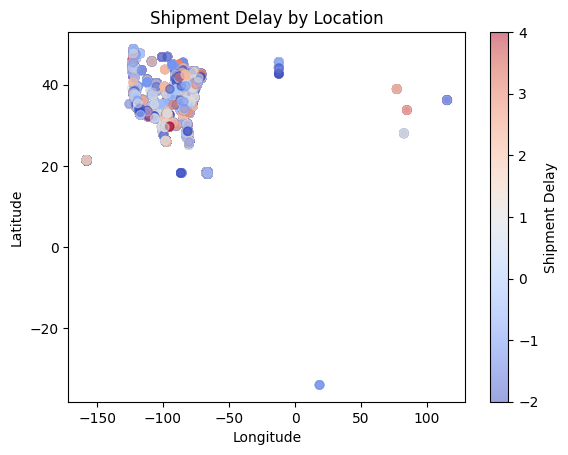

In [ ]:
plt.scatter(df['Longitude'], df['Latitude'], c=df['Shipment_Delay'], cmap='coolwarm', alpha=0.5)
plt.colorbar(label='Shipment Delay')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Shipment Delay by Location')
plt.show()


In [ ]:
print(df[['Longitude', 'Latitude', 'Shipment_Delay']].corr())


                Longitude  Latitude  Shipment_Delay
Longitude        1.000000 -0.525122        0.000871
Latitude        -0.525122  1.000000        0.000450
Shipment_Delay   0.000871  0.000450        1.000000


I dont see any pattern between Longitude, Latitude and Shipment delay, so lets drop them

In [ ]:
df = df.drop(columns=['Longitude','Latitude'])

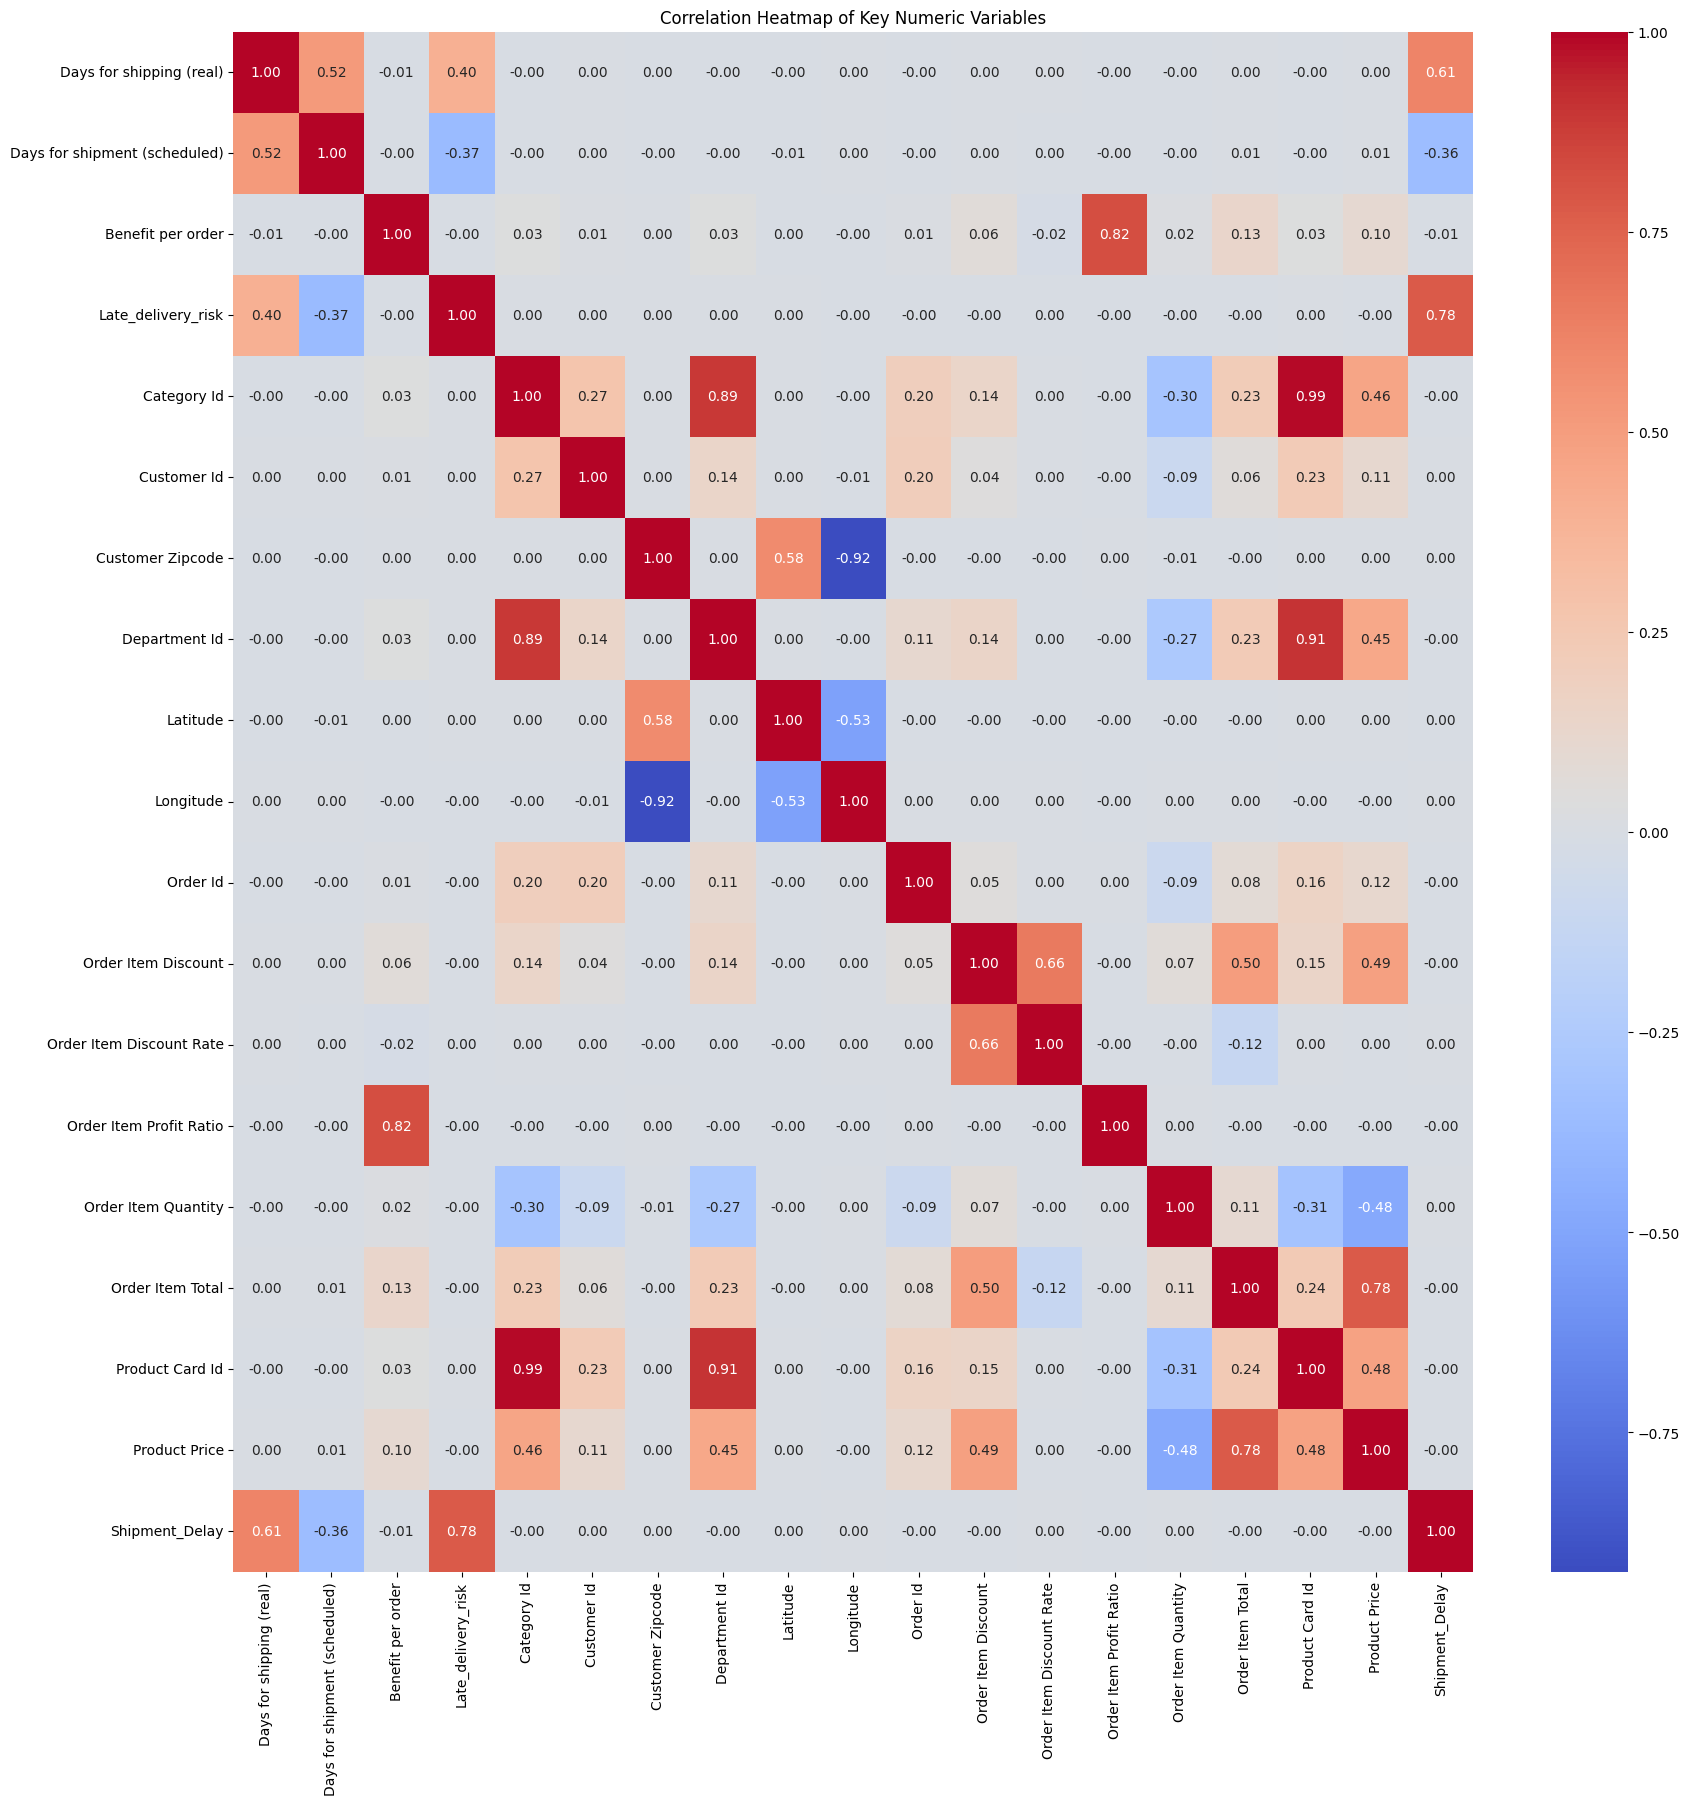

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 20))
sns.heatmap(df[numeric_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Key Numeric Variables')
plt.show()

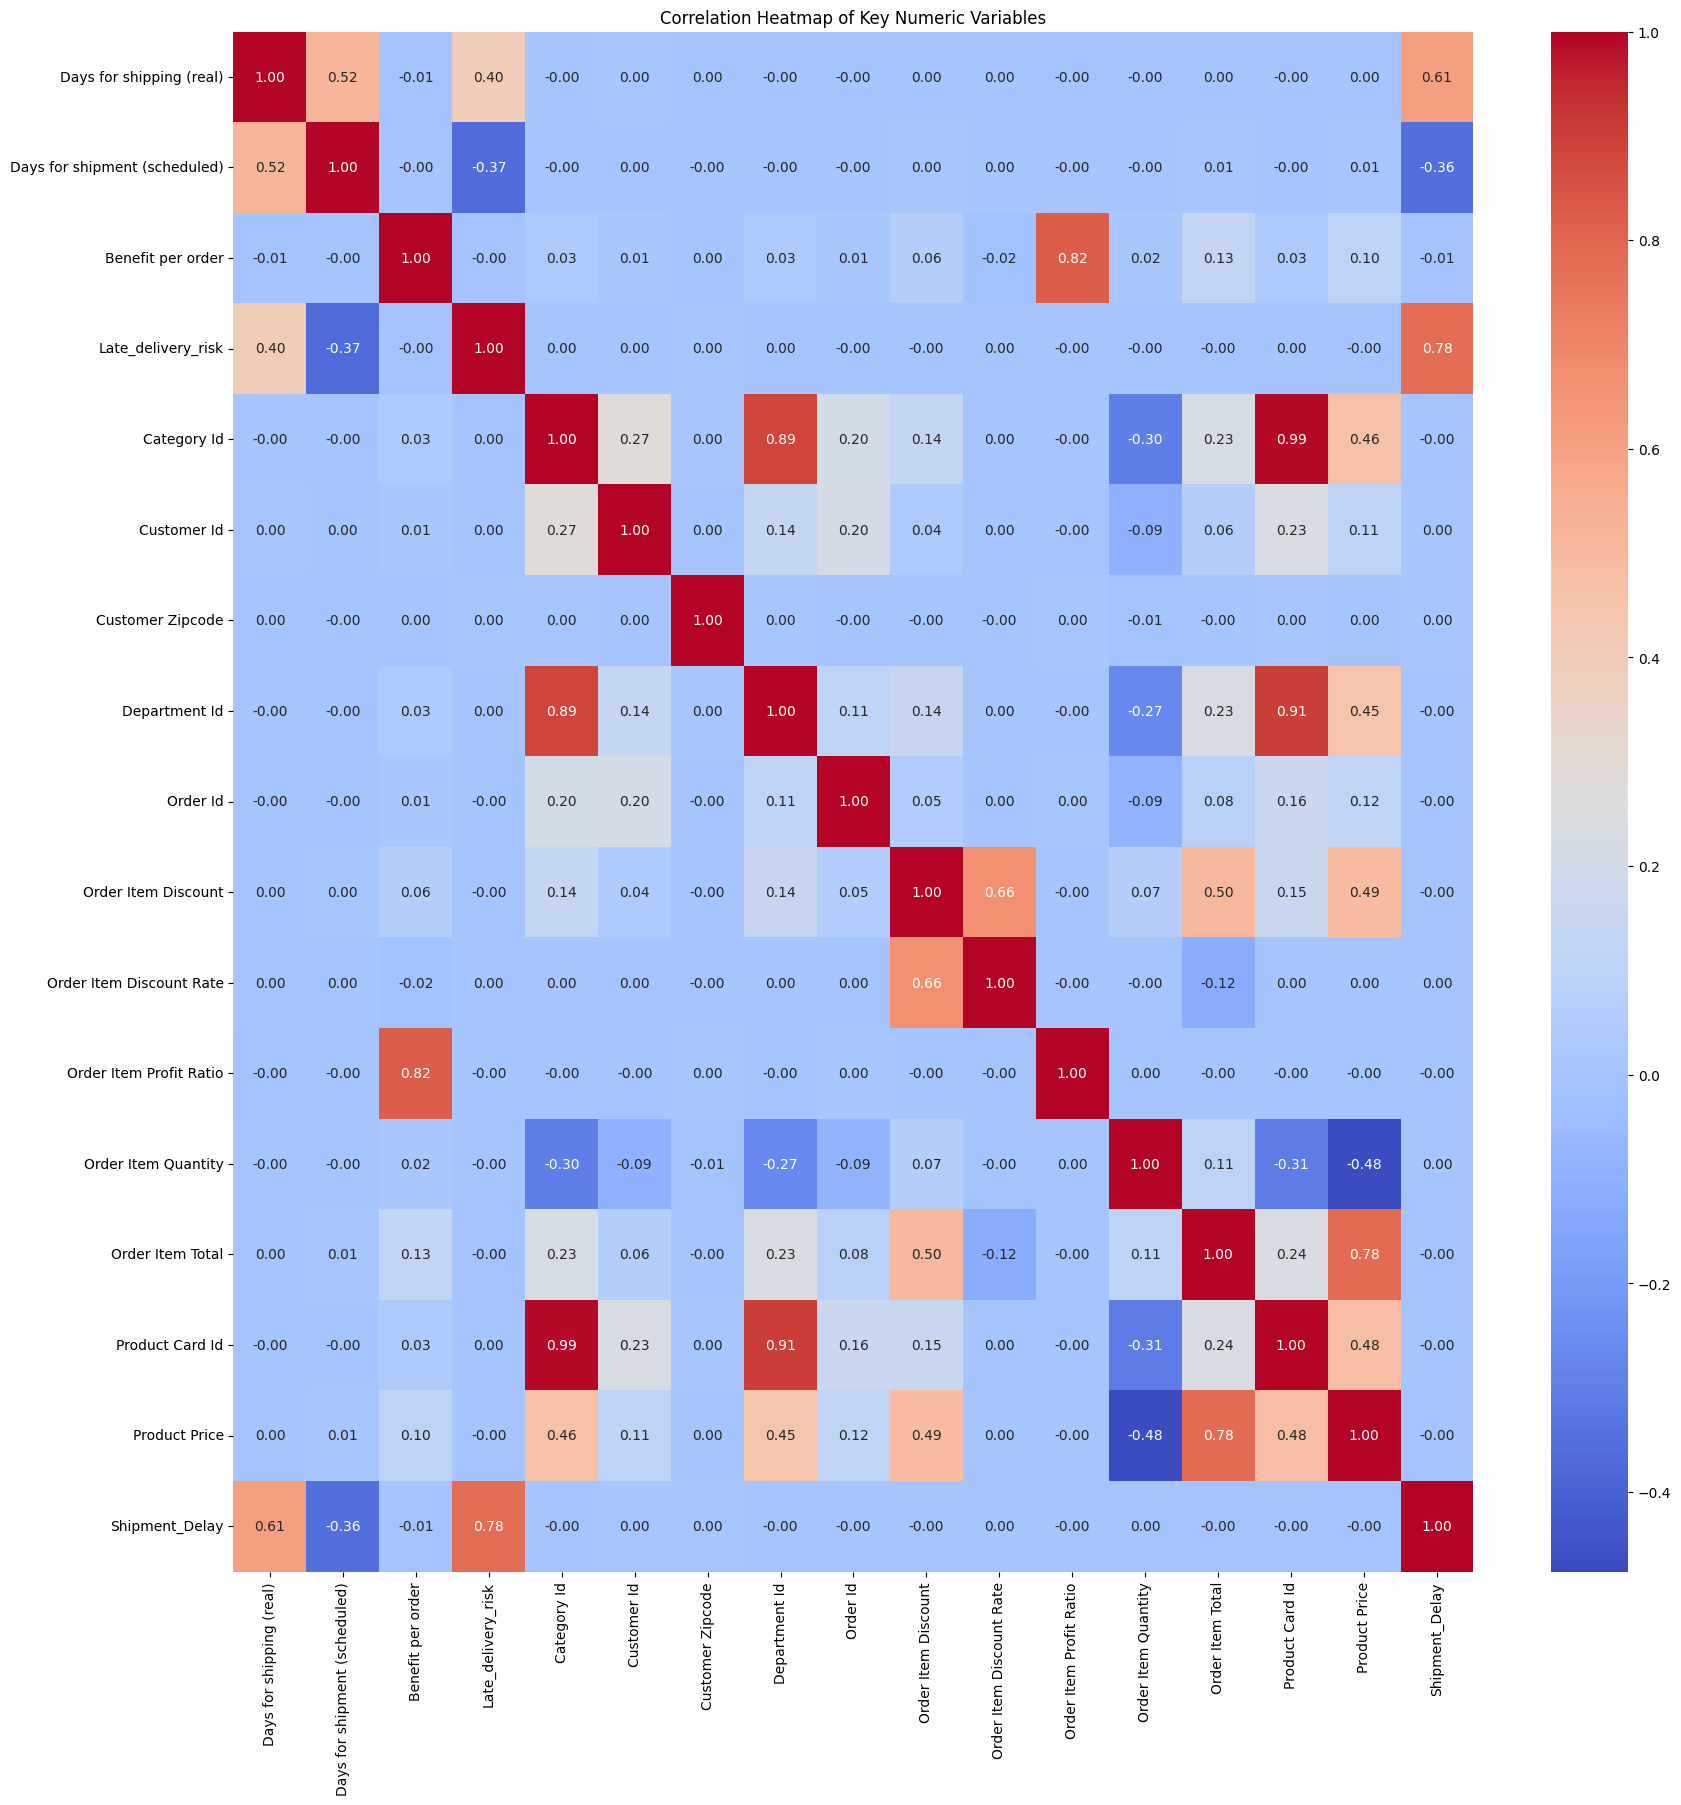

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 20))
sns.heatmap(df[numeric_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Key Numeric Variables')
plt.show()

In [ ]:
print("Column names:", df.columns.tolist())

# Print number of columns
print("Number of columns:", len(df.columns))

Column names: ['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer Country', 'Customer Id', 'Customer Segment', 'Customer Zipcode', 'Department Id', 'Department Name', 'Market', 'order date (DateOrders)', 'Order Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Profit Ratio', 'Order Item Quantity', 'Order Item Total', 'Order Status', 'Product Card Id', 'Product Name', 'Product Price', 'shipping date (DateOrders)', 'Shipping Mode', 'Shipment_Delay', 'Order Country Grouped', 'Customer State Grouped', 'Customer_State_Grouped', 'Customer_Zipcode_Grouped']
Number of columns: 33
